<a href="https://colab.research.google.com/github/Abhinair26/Swiggy-Sales-Forcast/blob/main/Swiggy_Sales_Forcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
# Load dataset
df = pd.read_csv('customers.csv')

In [9]:
# Load and preprocess customer data
df = pd.read_csv('customers.csv')
df['registration_date'] = pd.to_datetime(df['registration_date'], errors='coerce')
df = df.dropna(subset=['registration_date'])


In [10]:
# Group by date to simulate daily user sign-ups (proxy for demand trend)
daily_df = df.groupby('registration_date').size().reset_index(name='orders')

In [11]:
# Fill in missing dates (to simulate no orders = 0)
full_dates = pd.date_range(start=daily_df['registration_date'].min(),
                           end=daily_df['registration_date'].max())
daily_df = daily_df.set_index('registration_date').reindex(full_dates, fill_value=0)
daily_df.index.name = 'ds'
daily_df = daily_df.rename(columns={'orders': 'y'})


In [12]:
# Simulate realistic order volumes (scale up signups)
np.random.seed(42)
daily_df['y'] = (daily_df['y'] * np.random.uniform(10, 25)).astype(int)
daily_df['y'] = daily_df['y'].rolling(window=3, min_periods=1).mean().astype(int)

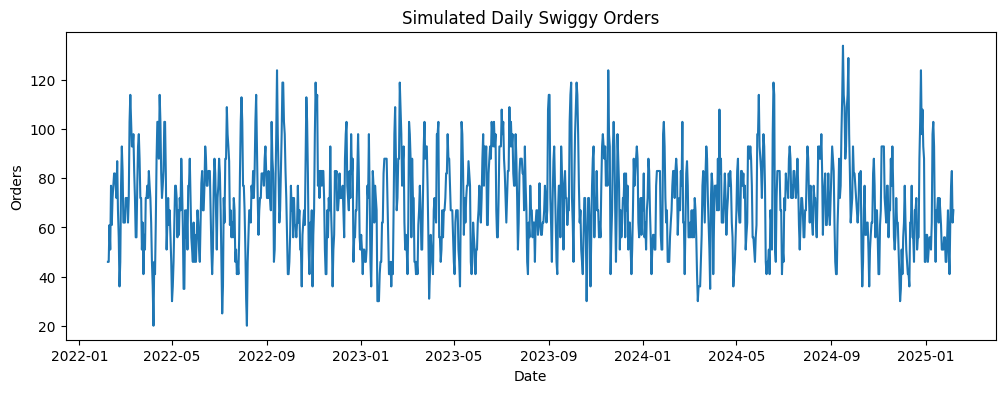

In [13]:
# Plot the simulated data
plt.figure(figsize=(12, 4))
plt.plot(daily_df.index, daily_df['y'])
plt.title('Simulated Daily Swiggy Orders')
plt.xlabel('Date')
plt.ylabel('Orders')
plt.show()

In [14]:
# --- Forecasting using Prophet ---
model = Prophet()
model.fit(daily_df.reset_index())


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd5ywrzrs/emyt1kte.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd5ywrzrs/lc9zbc96.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30932', 'data', 'file=/tmp/tmpd5ywrzrs/emyt1kte.json', 'init=/tmp/tmpd5ywrzrs/lc9zbc96.json', 'output', 'file=/tmp/tmpd5ywrzrs/prophet_modeltvj4qfjq/prophet_model-20250626095709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [15]:
# Forecast next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

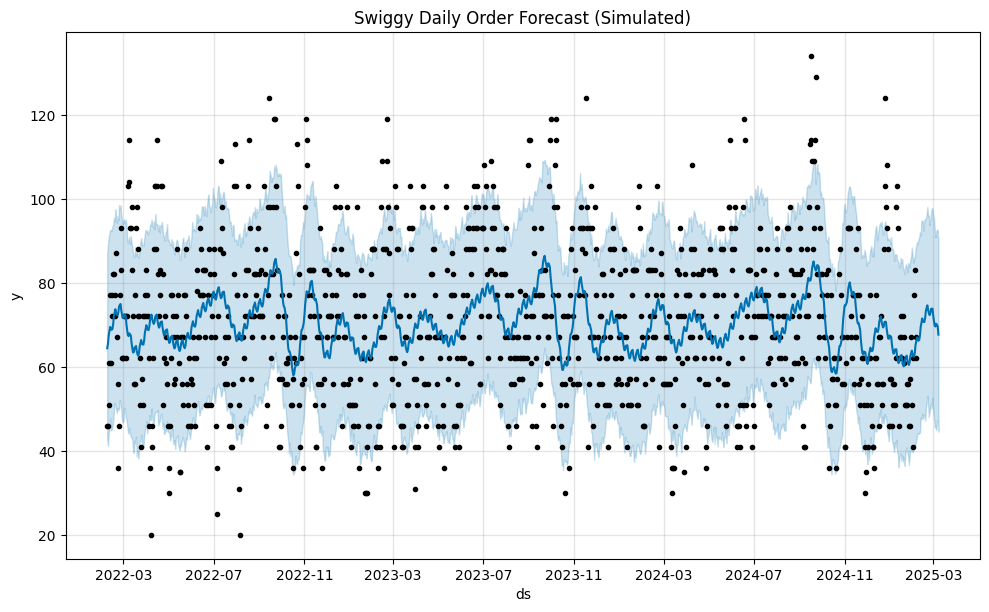

In [16]:
# Plot the forecast
model.plot(forecast)
plt.title("Swiggy Daily Order Forecast (Simulated)")
plt.show()

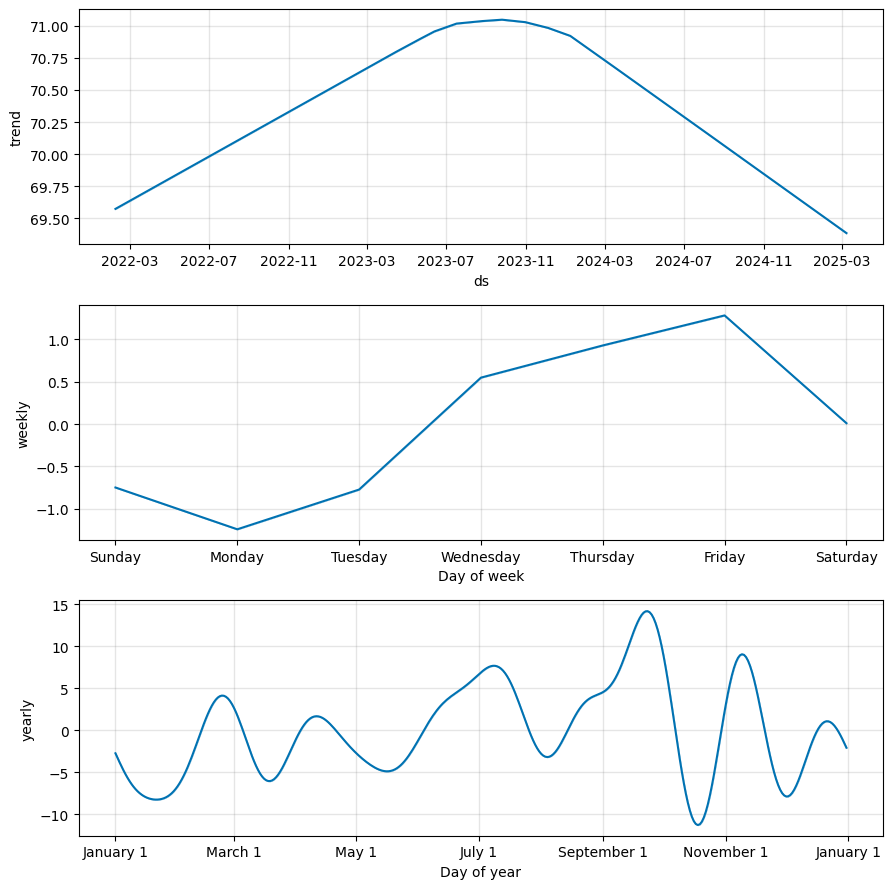

In [17]:
# Plot forecast components (trend, weekly seasonality)
model.plot_components(forecast)
plt.show()